In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

In [2]:
def all_equal(arr):
    if np.sum(arr==arr[0])==len(arr):
        return True
    else:
        return False

In [3]:
def diversity_sim(N,sim_number,steps):
    descendants=np.arange(1,N+1)
    simulations=np.array([descendants]*sim_number)
    for step in np.arange(steps+1):
        for sim in simulations:
            x_b=min(math.floor(random.uniform(0,1)*N),N-1)
            x_m=min(math.floor(random.uniform(0,1)*N),N-1)
            sim[x_m]=sim[x_b]
    return all_equal(np.array([all_equal(sim) for sim in simulations]))

In [4]:
diversity_sim(6,1,1000)

True

In [5]:
diversity_sim(6,100,1000)

True

In [6]:
def diversity_sim_descendant_count(N,sim_number,steps,num_count):
    descendants=np.arange(1,N+1)
    simulations=np.array([descendants]*sim_number)
    counter=np.zeros(sim_number)
    for step in np.arange(steps+1):
        for index,sim in enumerate(simulations):
            x_b=min(math.floor(random.uniform(0,1)*N),N-1)
            x_m=min(math.floor(random.uniform(0,1)*N),N-1)
            sim[x_m]=sim[x_b]
            if sim[x_b] == num_count:
                counter[index]+=1
    sns.histplot(counter)
    return np.percentile(counter,[0,25,50,75,100]),np.mean(counter)
               

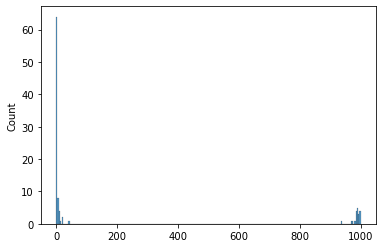

In [14]:
n_1=diversity_sim_descendant_count(6,100,1000,1)
plt.savefig("div_sim_descendant_count")

In [15]:
n_1

(array([  0.  ,   0.  ,   1.  ,   9.25, 999.  ]), 199.43)

In [8]:
def diversity_sim_homogenization_rate(N,sim_number,steps,graph=True):
    descendants=np.arange(1,N+1)
    completed = np.array([np.empty(2)]*sim_number)
    simulations=np.array([descendants]*sim_number)
    for step in np.arange(steps+1):
        if np.equal(completed.transpose()[0],np.arange(sim_number)).all()==True:
            break
        for index,sim in enumerate(simulations):
            if np.isin(index,completed.transpose()[0])==True:
                continue
            else:
                x_b=min(math.floor(random.uniform(0,1)*N),N-1)
                x_m=min(math.floor(random.uniform(0,1)*N),N-1)
                sim[x_m]=sim[x_b]
                if all_equal(sim)==True:
                    completed[index][0]=index
                    completed[index][1]=step
    if graph==True:
        sns.histplot(completed.transpose()[1])
    return np.percentile(completed.transpose()[1],[0,25,50,75,100]),np.mean(completed.transpose()[1])
    

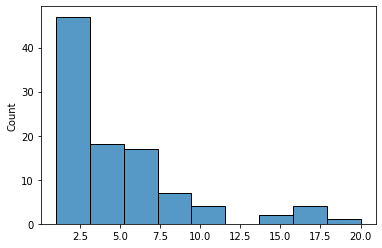

In [16]:
n_2=diversity_sim_homogenization_rate(3,100,1000)
plt.savefig("div_sim_hom_3")

In [17]:
n_2

(array([ 1.,  2.,  4.,  7., 20.]), 5.02)

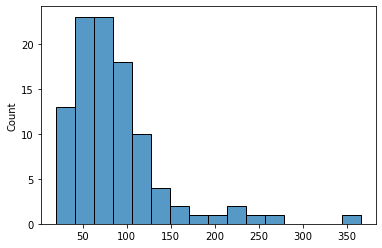

In [18]:
n_3=diversity_sim_homogenization_rate(10,100,1000)
plt.savefig("div_sim_hom_10")

In [19]:
n_3

(array([ 20.,  54.,  74., 106., 365.]), 88.1)

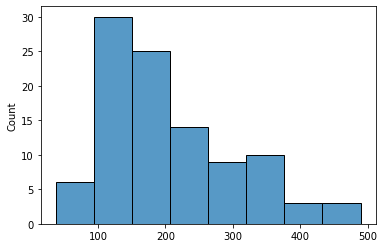

In [20]:
n_4=diversity_sim_homogenization_rate(15,100,1000)
plt.savefig("div_sim_hom_15")

In [21]:
n_4

(array([ 38.  , 124.75, 184.5 , 261.75, 489.  ]), 205.58)

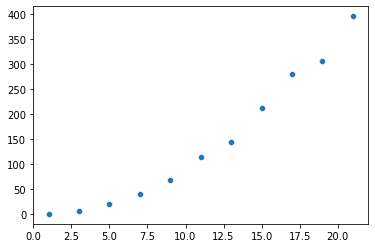

In [12]:
data=np.array([diversity_sim_homogenization_rate(N,100,1000,False)[1] for N in np.arange(1,23,2)])
sns.scatterplot(x=np.arange(1,23,2),y=data)
plt.savefig("div_sim_hom_rates")

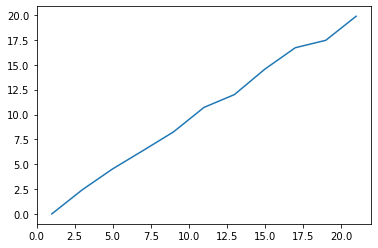

In [13]:
sns.lineplot(x=np.arange(1,23,2),y=[math.sqrt(d) for d in data])
plt.savefig("div_sim_hom_regression")